In [2]:
import pandas as pd
import numpy as np

In [5]:
cd Supermarket

/Users/monikaju/Desktop/Supermarket


In [213]:
df1= pd.read_csv('/Users/monikaju/Desktop/Supermarket/tuesday.csv', delimiter=';',parse_dates=True,index_col=0)
df2= pd.read_csv('/Users/monikaju/Desktop/Supermarket/monday.csv', delimiter=';',parse_dates=True)
df3= pd.read_csv('/Users/monikaju/Desktop/Supermarket/wednesday.csv', delimiter=';',parse_dates=True)
df4= pd.read_csv('/Users/monikaju/Desktop/Supermarket/thursday.csv', delimiter=';',parse_dates=True)
df5= pd.read_csv('/Users/monikaju/Desktop/Supermarket/friday.csv', delimiter=';',parse_dates=True)

In [214]:
df1

,customer_no,location
timestamp,,
2019-09-03 07:02:00,1,fruit
2019-09-03 07:02:00,2,drinks
2019-09-03 07:03:00,3,dairy
2019-09-03 07:05:00,1,drinks
2019-09-03 07:06:00,4,dairy
...,...,...
2019-09-03 21:47:00,1421,drinks
2019-09-03 21:47:00,1422,dairy
2019-09-03 21:48:00,1421,checkout


##### Calculate the number of customers in each session

In [111]:
df1.groupby(['location'])['customer_no'].nunique()

location
checkout    1420
dairy        751
drinks       581
fruit        827
spices       543
Name: customer_no, dtype: int64

In [112]:
df1.groupby('location')['customer_no'].count()

location
checkout    1420
dairy        911
drinks       713
fruit        976
spices       694
Name: customer_no, dtype: int64

##### Calculate the total number of customers in each section over time

In [113]:
ct =df1.groupby(['location','timestamp'])['customer_no'].nunique().unstack()

In [114]:
ct=ct.T

In [117]:
ct

location,checkout,dairy,drinks,fruit,spices
timestamp,,,,,
2019-09-03 07:02:00,NaN,NaN,1.0,1.0,NaN
2019-09-03 07:03:00,NaN,1.0,NaN,NaN,NaN
2019-09-03 07:05:00,NaN,NaN,1.0,NaN,NaN
2019-09-03 07:06:00,NaN,2.0,NaN,NaN,NaN
2019-09-03 07:07:00,NaN,3.0,NaN,NaN,NaN
...,...,...,...,...,...
2019-09-03 21:46:00,2.0,NaN,NaN,1.0,1.0
2019-09-03 21:47:00,NaN,1.0,1.0,NaN,NaN
2019-09-03 21:48:00,1.0,NaN,NaN,NaN,NaN


In [115]:
ct.describe()

location,checkout,dairy,drinks,fruit,spices
count,682.000000,527.000000,456.000000,521.000000,450.000000
mean,2.082111,1.728653,1.563596,1.873321,1.542222
std,1.218676,0.988717,0.828285,1.031838,0.841170
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,1.000000,1.000000,2.000000,1.000000
75%,3.000000,2.000000,2.000000,2.000000,2.000000
max,8.000000,6.000000,6.000000,5.000000,6.000000


##### Display the number of customers at checkout over time

In [172]:
co=ct.checkout

In [173]:
co=pd.DataFrame(co)

In [174]:
co.tail()

,checkout
timestamp,
2019-09-03 21:46:00,2.0
2019-09-03 21:47:00,NaN
2019-09-03 21:48:00,1.0
2019-09-03 21:49:00,1.0
2019-09-03 21:50:00,NaN


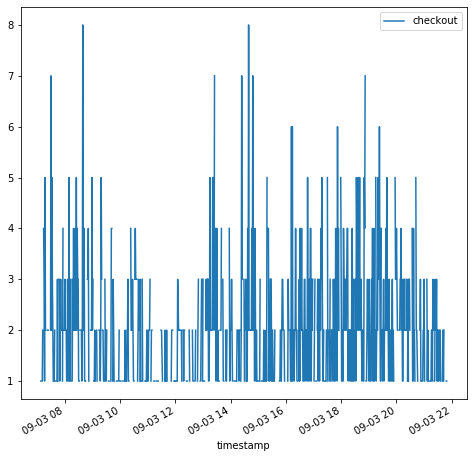

In [175]:
co.plot(figsize=(8, 8))

In [176]:
co.reset_index(inplace=True)

In [177]:
co

,timestamp,checkout
0,2019-09-03 07:02:00,NaN
1,2019-09-03 07:03:00,NaN
2,2019-09-03 07:05:00,NaN
3,2019-09-03 07:06:00,NaN
4,2019-09-03 07:07:00,NaN
...,...,...
856,2019-09-03 21:46:00,2.0
857,2019-09-03 21:47:00,NaN
858,2019-09-03 21:48:00,1.0
859,2019-09-03 21:49:00,1.0


In [178]:
def time_stamps(df):
    df['hour'] = co.timestamp.dt.hour
    df['day'] = co.timestamp.dt.day
    df['month'] = co.timestamp.dt.month
    df['year'] = co.timestamp.dt.year
    return df


In [182]:
co2=time_stamps(co)

In [183]:
co2

,timestamp,checkout,hour,day,month,year
0,2019-09-03 07:02:00,NaN,7,3,9,2019
1,2019-09-03 07:03:00,NaN,7,3,9,2019
2,2019-09-03 07:05:00,NaN,7,3,9,2019
3,2019-09-03 07:06:00,NaN,7,3,9,2019
4,2019-09-03 07:07:00,NaN,7,3,9,2019
...,...,...,...,...,...,...
856,2019-09-03 21:46:00,2.0,21,3,9,2019
857,2019-09-03 21:47:00,NaN,21,3,9,2019
858,2019-09-03 21:48:00,1.0,21,3,9,2019
859,2019-09-03 21:49:00,1.0,21,3,9,2019


In [188]:
co2=co2.groupby('hour').nunique()

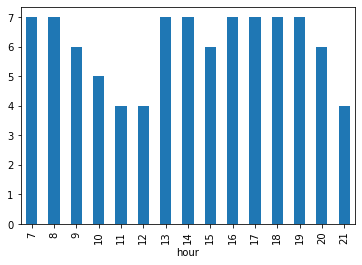

In [191]:
co2['checkout'].plot.bar()

##### Calculate the time each customer spent in the market

In [215]:
df1.reset_index(inplace=True)

In [253]:
df1.head()

,timestamp,customer_no,location
0,2019-09-03 07:02:00,1,fruit
1,2019-09-03 07:02:00,2,drinks
2,2019-09-03 07:03:00,3,dairy
3,2019-09-03 07:05:00,1,drinks
4,2019-09-03 07:06:00,4,dairy


In [258]:
dfT=df1.groupby(['customer_no','location','timestamp']).count()

In [259]:
dfT

Empty DataFrame
Columns: []
Index: [(1, checkout, 2019-09-03 07:12:00), (1, drinks, 2019-09-03 07:05:00), (1, fruit, 2019-09-03 07:02:00), (2, checkout, 2019-09-03 07:17:00), (2, drinks, 2019-09-03 07:02:00), (2, fruit, 2019-09-03 07:14:00), (3, checkout, 2019-09-03 07:10:00), (3, dairy, 2019-09-03 07:03:00), (4, checkout, 2019-09-03 07:12:00), (4, dairy, 2019-09-03 07:06:00), (4, drinks, 2019-09-03 07:09:00), (4, spices, 2019-09-03 07:08:00), (5, checkout, 2019-09-03 07:09:00), (5, dairy, 2019-09-03 07:06:00), (6, checkout, 2019-09-03 07:23:00), (6, dairy, 2019-09-03 07:07:00), (6, dairy, 2019-09-03 07:16:00), (6, spices, 2019-09-03 07:15:00), (7, checkout, 2019-09-03 07:15:00), (7, dairy, 2019-09-03 07:07:00), (7, drinks, 2019-09-03 07:12:00), (7, fruit, 2019-09-03 07:10:00), (8, checkout, 2019-09-03 07:08:00), (8, dairy, 2019-09-03 07:07:00), (9, checkout, 2019-09-03 07:30:00), (9, dairy, 2019-09-03 07:13:00), (9, dairy, 2019-09-03 07:23:00), (9, fruit, 2019-09-03 07:10:00), (9, fruit, 2019-09-03 07:21:00), (10, checkout, 2019-09-03 07:14:00), (10, fruit, 2019-09-03 07:10:00), (11, checkout, 2019-09-03 07:11:00), (11, fruit, 2019-09-03 07:10:00), (12, checkout, 2019-09-03 07:15:00), (12, fruit, 2019-09-03 07:10:00), (13, checkout, 2019-09-03 07:14:00), (13, dairy, 2019-09-03 07:10:00), (13, drinks, 2019-09-03 07:11:00), (14, checkout, 2019-09-03 07:30:00), (14, dairy, 2019-09-03 07:11:00), (14, dairy, 2019-09-03 07:21:00), (14, drinks, 2019-09-03 07:29:00), (14, fruit, 2019-09-03 07:17:00), (14, fruit, 2019-09-03 07:27:00), (15, checkout, 2019-09-03 07:17:00), (15, dairy, 2019-09-03 07:14:00), (15, fruit, 2019-09-03 07:13:00), (15, spices, 2019-09-03 07:11:00), (16, checkout, 2019-09-03 07:20:00), (16, dairy, 2019-09-03 07:11:00), (16, dairy, 2019-09-03 07:18:00), (16, drinks, 2019-09-03 07:15:00), (16, fruit, 2019-09-03 07:17:00), (17, checkout, 2019-09-03 07:14:00), (17, fruit, 2019-09-03 07:12:00), (18, checkout, 2019-09-03 07:17:00), (18, dairy, 2019-09-03 07:16:00), (18, fruit, 2019-09-03 07:12:00), (19, checkout, 2019-09-03 07:20:00), (19, dairy, 2019-09-03 07:13:00), (19, drinks, 2019-09-03 07:14:00), (19, drinks, 2019-09-03 07:19:00), (19, fruit, 2019-09-03 07:18:00), (20, checkout, 2019-09-03 07:14:00), (20, spices, 2019-09-03 07:13:00), (21, checkout, 2019-09-03 07:20:00), (21, drinks, 2019-09-03 07:14:00), (21, drinks, 2019-09-03 07:17:00), (21, spices, 2019-09-03 07:15:00), (22, checkout, 2019-09-03 07:16:00), (22, drinks, 2019-09-03 07:14:00), (23, checkout, 2019-09-03 07:17:00), (23, fruit, 2019-09-03 07:14:00), (24, checkout, 2019-09-03 07:18:00), (24, drinks, 2019-09-03 07:16:00), (24, fruit, 2019-09-03 07:14:00), (24, spices, 2019-09-03 07:15:00), (25, checkout, 2019-09-03 07:15:00), (25, dairy, 2019-09-03 07:14:00), (26, checkout, 2019-09-03 07:18:00), (26, drinks, 2019-09-03 07:17:00), (26, spices, 2019-09-03 07:15:00), (27, checkout, 2019-09-03 07:20:00), (27, fruit, 2019-09-03 07:18:00), (27, spices, 2019-09-03 07:15:00), (28, checkout, 2019-09-03 07:17:00), (28, fruit, 2019-09-03 07:16:00), (28, spices, 2019-09-03 07:15:00), (29, checkout, 2019-09-03 07:29:00), (29, dairy, 2019-09-03 07:20:00), (29, dairy, 2019-09-03 07:23:00), (29, drinks, 2019-09-03 07:21:00), (29, drinks, 2019-09-03 07:24:00), (29, drinks, 2019-09-03 07:26:00), (29, fruit, 2019-09-03 07:19:00), (29, spices, 2019-09-03 07:25:00), (30, checkout, 2019-09-03 07:22:00), (30, drinks, 2019-09-03 07:19:00), (31, checkout, 2019-09-03 07:33:00), (31, drinks, 2019-09-03 07:20:00), ...]

[4714 rows x 0 columns]

In [245]:
dfT=pd.DataFrame(dfT)

In [251]:
dfT.unstock()

AttributeError: 'DataFrame' object has no attribute 'unstock'

In [219]:
dfT=df1.groupby(['customer_no','timestamp']).count().unstack()


In [223]:
dfT

location                                          \
timestamp   2019-09-03 07:02:00 2019-09-03 07:03:00 2019-09-03 07:05:00   
customer_no                                                               
1                           1.0                 NaN                 1.0   
2                           1.0                 NaN                 NaN   
3                           NaN                 1.0                 NaN   
4                           NaN                 NaN                 NaN   
5                           NaN                 NaN                 NaN   
...                         ...                 ...                 ...   
1418                        NaN                 NaN                 NaN   
1419                        NaN                 NaN                 NaN   
1420                        NaN                 NaN                 NaN   
1421                        NaN                 NaN                 NaN   
1422                        NaN                 NaN                 NaN   

                                                                         \
timestamp   2019-09-03 07:06:00 2019-09-03 07:07:00 2019-09-03 07:08:00   
customer_no                                                               
1                           NaN                 NaN                 NaN   
2                           NaN                 NaN                 NaN   
3                           NaN                 NaN                 NaN   
4                           1.0                 NaN                 1.0   
5                           1.0                 NaN                 NaN   
...                         ...                 ...                 ...   
1418                        NaN                 NaN                 NaN   
1419                        NaN                 NaN                 NaN   
1420                        NaN                 NaN                 NaN   
1421                        NaN                 NaN                 NaN   
1422                        NaN                 NaN                 NaN   

                                                                         \
timestamp   2019-09-03 07:09:00 2019-09-03 07:10:00 2019-09-03 07:11:00   
customer_no                                                               
1                           NaN                 NaN                 NaN   
2                           NaN                 NaN                 NaN   
3                           NaN                 1.0                 NaN   
4                           1.0                 NaN                 NaN   
5                           1.0                 NaN                 NaN   
...                         ...                 ...                 ...   
1418                        NaN                 NaN                 NaN   
1419                        NaN                 NaN                 NaN   
1420                        NaN                 NaN                 NaN   
1421                        NaN                 NaN                 NaN   
1422                        NaN                 NaN                 NaN   

                                 ...                                          \
timestamp   2019-09-03 07:12:00  ... 2019-09-03 21:40:00 2019-09-03 21:41:00   
customer_no                      ...                                           
1                           1.0  ...                 NaN                 NaN   
2                           NaN  ...                 NaN                 NaN   
3                           NaN  ...                 NaN                 NaN   
4                           1.0  ...                 NaN                 NaN   
5                           NaN  ...                 NaN                 NaN   
...                         ...  ...                 ...                 ...   
1418                        NaN  ...                 NaN                 NaN   
1419                        NaN  ...                 NaN              

In [220]:
dfT.T

customer_no                   1     2     3     4     5     6     7     8     \
         timestamp                                                             
location 2019-09-03 07:02:00   1.0   1.0   NaN   NaN   NaN   NaN   NaN   NaN   
         2019-09-03 07:03:00   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   
         2019-09-03 07:05:00   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
         2019-09-03 07:06:00   NaN   NaN   NaN   1.0   1.0   NaN   NaN   NaN   
         2019-09-03 07:07:00   NaN   NaN   NaN   NaN   NaN   1.0   1.0   1.0   
...                            ...   ...   ...   ...   ...   ...   ...   ...   
         2019-09-03 21:46:00   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
         2019-09-03 21:47:00   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
         2019-09-03 21:48:00   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
         2019-09-03 21:49:00   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
         2019-09-03 21:50:00   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

customer_no                   9     10    ...  1413  1414  1415  1416  1417  \
         timestamp                        ...                                 
location 2019-09-03 07:02:00   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   
         2019-09-03 07:03:00   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   
         2019-09-03 07:05:00   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   
         2019-09-03 07:06:00   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   
         2019-09-03 07:07:00   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   
...                            ...   ...  ...   ...   ...   ...   ...   ...   
         2019-09-03 21:46:00   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   
         2019-09-03 21:47:00   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   
         2019-09-03 21:48:00   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   
         2019-09-03 21:49:00   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   
         2019-09-03 21:50:00   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   

customer_no                   1418  1419  1420  1421  1422  
         timestamp                                          
location 2019-09-03 07:02:00   NaN   NaN   NaN   NaN   NaN  
         2019-09-03 07:03:00   NaN   NaN   NaN   NaN   NaN  
         2019-09-03 07:05:00   NaN   NaN   NaN   NaN   NaN  
         2019-09-03 07:06:00   NaN   NaN   NaN   NaN   NaN  
         2019-09-03 07:07:00   NaN   NaN   NaN   NaN   NaN  
...                            ...   ...   ...   ...   ...  
         2019-09-03 21:46:00   NaN   NaN   1.0   1.0   1.0  
         2019-09-03 21:47:00   NaN   NaN   NaN   1.0   1.0  
         2019-09-03 21:48:00   NaN   NaN   NaN   1.0   NaN  
         2019-09-03 21:49:00   NaN   NaN   NaN   NaN   NaN  
         2019-09-03 21:50:00   NaN   NaN   NaN   NaN   NaN  

[861 rows x 1422 columns]